### Cardio Good Fitness Case Study - Descriptive Statistics  

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

#### The team identifies the following customer variables to study:  
* product purchased, TM195, TM498, or TM798;  
* gender;  
* age, in years;  
* education, in years;  
* relationship status, single or partnered;  
* annual household income ;  
* average number of times the customer plans to use the treadmill each week;  
* average number of miles the customer expects to walk/run each week;
* and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.  



#### Importing the required packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [7]:
df = pd.read_csv("CardioGoodFitness.csv")

In [8]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [9]:
df.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [11]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [12]:
df.select_dtypes(exclude = ["number"])

,Product,Gender,MaritalStatus
0,TM195,Male,Single
1,TM195,Male,Single
2,TM195,Female,Partnered
3,TM195,Male,Single
4,TM195,Male,Partnered
...,...,...,...
175,TM798,Male,Single
176,TM798,Male,Single
177,TM798,Male,Single
178,TM798,Male,Partnered


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

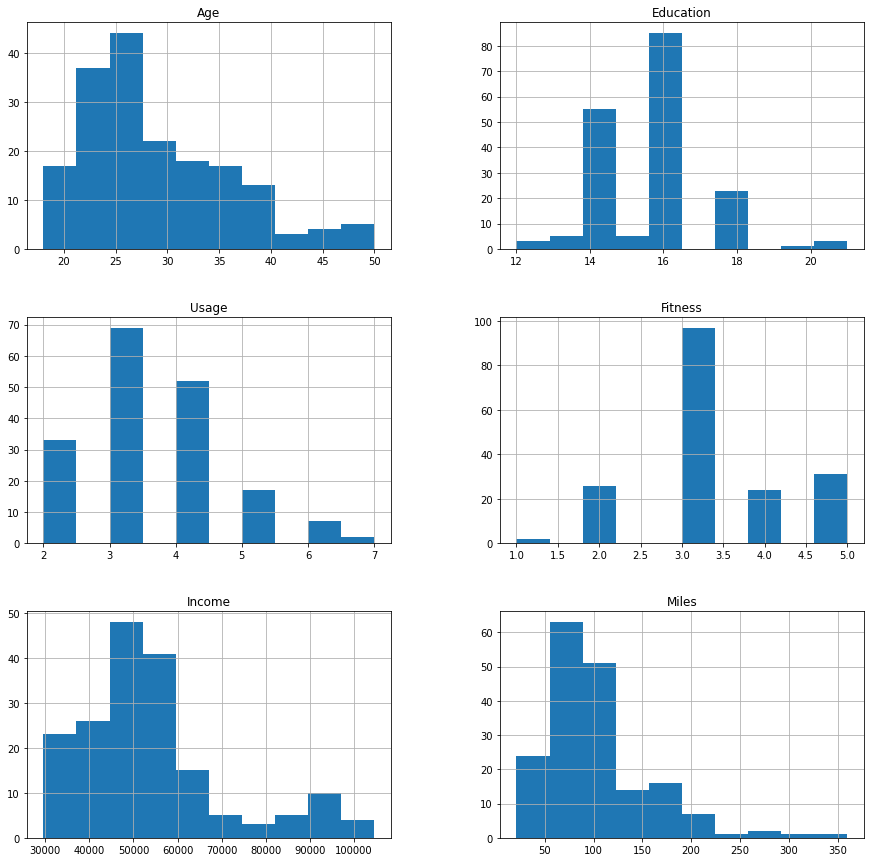

In [13]:
df.hist(figsize= (15,15))

<AxesSubplot:xlabel='Gender', ylabel='Age'>

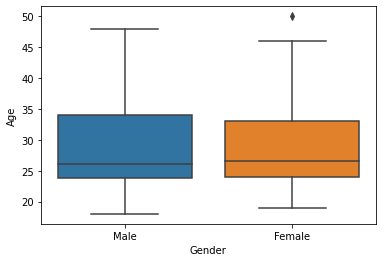

In [14]:
sns.boxplot(x = "Gender", y = "Age", data =df )

We can see outlier for age of females as there are observations even beyond the top whisker (each whisker by default extends 1.5 times the IQR).
For males, there are no outliers for age.  

The line inside the box in the boxplot represents the median. The median age for both males and females are same.

In [15]:
pd.crosstab(df["Product"], df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


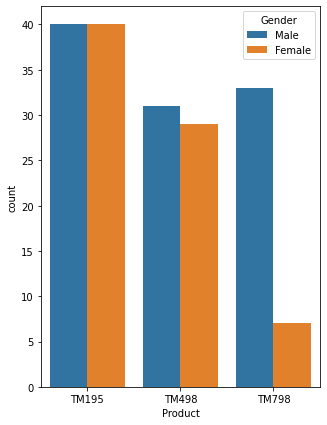

In [16]:
g = sns.countplot(x = "Product", hue = "Gender",
                  orient = "h", dodge = True, data = df)
g.figure.set_figheight(7)
g.figure.set_figwidth(5)

In [17]:
pd.pivot_table(df, index = ["Product", "Gender"],
               columns= ["MaritalStatus"],aggfunc = len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [18]:
pd.pivot_table(df, "Income", index = ["Product", "Gender"],
               columns= ["MaritalStatus"])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

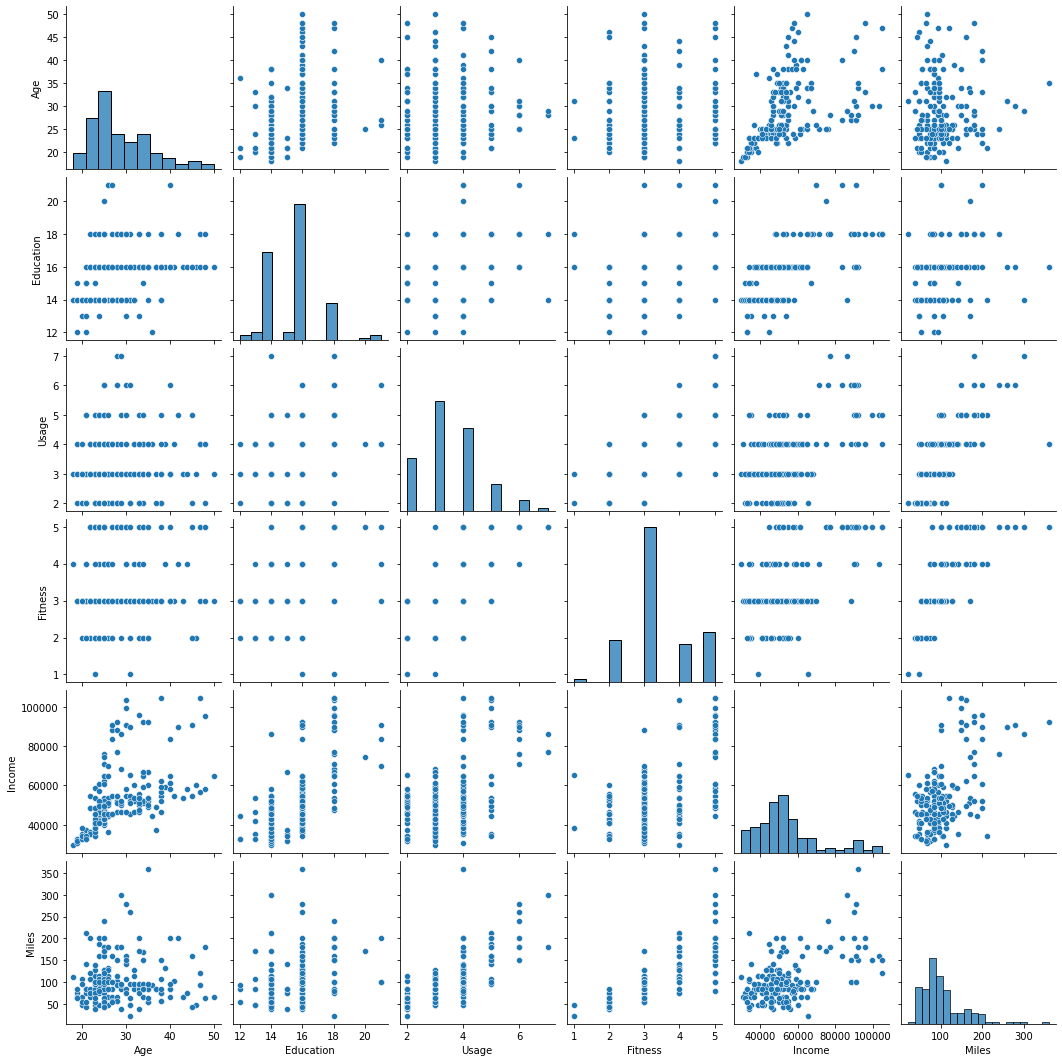

In [19]:
sns.pairplot(df)
# ignores variables of object datatypes 
# It is computational in nature and will take in all numerical variables

In [20]:
df["Age"].mean()

28.788888888888888

#### Zipcode requires special solution as it is categorical but would be identified as numerical by default

/Users/bhaskarroy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


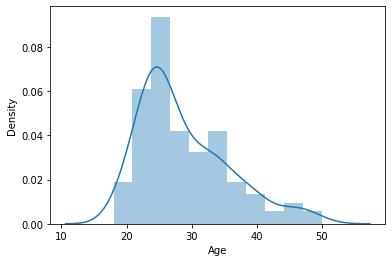

In [21]:
sns.distplot(df["Age"]);

#### Density Plots :  
kde (Gaussian kernel density estimate plot) gives the underlying distribution which is the systematic part unaffected by the random errors/variability due to sampling.The Density plot gives a Visual description or simply descriptive representation of the underlying distribution.  
  
If our distribution thinking is correct, kde should remain unaffected by the choice of samples.  
There is an underlying truth but we are not able to see as we have taken a sample.
There is an underlying level of blood pressure which we have not seen because we are not able to cover the entire range of possibilities of blood pressures. Measurement in different contexts, situations - at different times, durations, places. For instance, certain bp measurements are sensitive to the body metabolism.  
  
Cover the entire range of possibilities to see the distribution. If we do not do that, we cannot foresee from where the data can come from. And we may not be able to do predictive and presciptive analytics. 

#### Histograms might differ from sample to sample by the dist plot should remain similar.
Histogram summary applies to the particular sample.  

F(x) = P(X$\geq$ x)  
f(x) = $F^{'}$(x)  
  
Distribution function is the integral of the density function.  
Density function is the derivative of the Distribution function.

### The million dollar question ! !
Nobody is interested in your data. 
But we have to analyse our data and figure out a strategy.  
We arrive at the essence of Statistical inference.

For instance the mean age is 28. But I am not sure if I take a different sample, will I get the same mean.  
So, I will give my answer to the mean in terms of an interval i.e. (mean-s.e,mean+s.e) with certain level of confidence. 

The larger the sample size, the smaller the interval. 

For instance in a business context, we have released a new product, we want to know the sales.  
We are uncertain, we get more and more data to know the distribution. There are so many variables are here.

#### With more and more data and experience, you will uncover the distribution.

Say if your are doing sentiment analysis. You take twitter data and find the sentiment scores. But what matters also is over what granularity are you expecting to see the peoples opinions remain same. 

If opinions change every month, I can have a good estimate that is gonna serve me every month.
But if opinion change very day, my estimate is not gonna be useful. 

Whether I am estimating a changing thing or I am estimating a changing thing.  
Target Distribution standard


From inferential perspective, we start with the sample estimate.

##### All models are wrong, but some models are useful.   - George Box
Weibull distribution - failure of turbines in engineering  
Log normal distribution - financial industry  
Every industry has its own favourite distribution.

People make assumptions in historical sense.  
There are distributions which have worked very well from experience.  
In certain industries, there are regulatory requirements as well to adhere to accepted distributions.

PAC Learning (Probably Approximately correct)  
Probably comes from statistics, approximately from ML


$\mu$ is a population parameter. It is fixed, it exists but we do not know its value.  
From our sample, we can take either the sample mean or median as an estimate of the population mean. 

For distributions, where we see outliers incase of skewed distributions, we would take median as the estimate of $\mu$.  
For fairly symmetric distribution, we would take the mean as the estimate.  
  
Mean and Median carry different kinds of information, both carry important connotations and are useful.  
Examples, per capita income from the mean and income of average indian from the median.  
Another example, Typical browsing behaviour can be represented in the form of heavy tailed distribution (many small numbers and a few larger numbers). 
If the question is how much time I am spending on a website. If I am asking for a representative number, what would be the answer - mean or median.  
  
Median is saying how much time I am spending on a typical website.  
If median is low, it would say most of the time, I am only cruising. On the other hand, if the mean is high, it suggest that I am spending lot of time on particular websites. << Network traffic problem>>  

Mean and Median are both simple algorithms.  
But Mode is a complex algorithm. Mode is the highest frequency or the most common value. Calculation of mode suggests that data is not numerical and is categorical. Coz it is based on count. It would want data to be placed in chunks/bins. Based on choice of bin width selection, calculation of count will differ. Same would not be the case with mean and median. And hence this has gone out of fashion.



array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

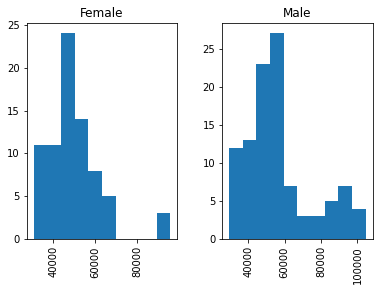

In [22]:
df.hist(by = "Gender", column = "Income")

array([[<AxesSubplot:title={'center':'TM195'}>,
        <AxesSubplot:title={'center':'TM498'}>],
       [<AxesSubplot:title={'center':'TM798'}>, <AxesSubplot:>]],
      dtype=object)

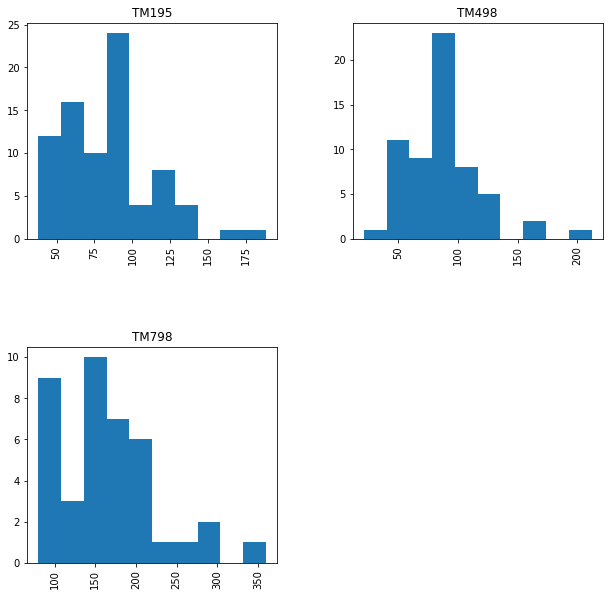

In [23]:
df.hist(by = "Product", column = "Miles", figsize=(10,10))

#### Bivariate Relationships  
A sense of relation or rather correlation  
Many many ways of defining the relationship with a number  
  
Covariance is used quite often in
* Dimensional Analysis
* Portfolio management  
  
Covariance gives a measure of the strength of linear relationship between two variables.
Covariance depends on the units of the variables. To take care of this, we standardise the deviances in the formula and this would give us the correlation between two variables.  
  
  
Formulas : 

$Cov_{x,y}$ = $\frac{\sum(X_i-\overline{X})(Y_i-\overline{Y})}{n-1}$

If with increase in values of x, if y also increases.
If with decrease in values of x, if y also decreases, covariance sign will be positive. 
Please note, we are not suggesting causation here but only correlation. 


Scaled verson of covariance is correlation.
Correlation = $\frac{1}{n-1}\sum\frac{(X_i-\overline{X})}{s_x}\frac{(Y_i-\overline{Y})}{s_y}$
  
  
  
  

In [24]:
corr = df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


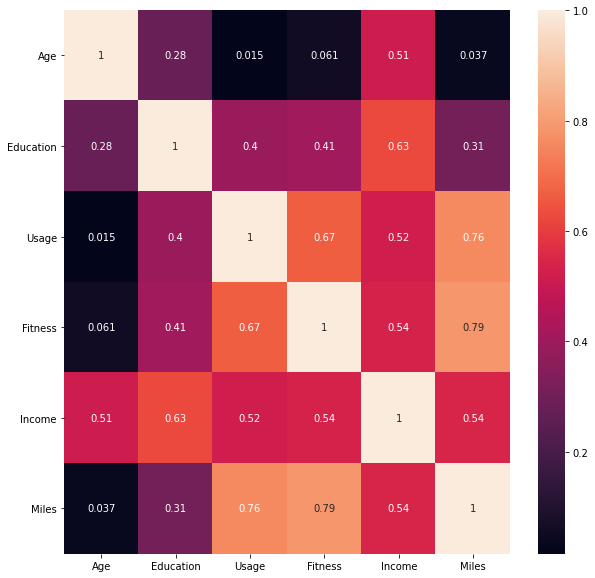

In [25]:
g = sns.heatmap(corr, annot= True)
g.figure.set_figheight(10)
g.figure.set_figwidth(10)

#### Heat Map  
Traditional choice is that Hot is related. (Red colours)  
White is not. But coding of heat map colours can be changed.

### Linear Regression

* Descriptive Usage
    - Simply describes, no predicting
* Predictive Usage  
    - Predicting on new data
* Prescriptive Usage  

  
3:22 https://youtu.be/u2zsY-2uZiE

### Descriptive Statistics   
* Univariate
    * Location - mean, median, Q3, Q1
    * Variation/Dispersion/Spread - Standard deviation, range, IQR
  
#### Five point summary covers both location and spread  
* Bivariate - covariance, correlation  
* Multivariate - Linear Regression  
    * $y = \beta_0+\beta_1x_1+...+\beta_px_p$  
* Plots - histogram, boxplots, pairs/scatterplots
  
https://latex.wikia.org/wiki/List_of_LaTeX_symbols


#### Visualization limitations in Multivariate Analysis  
-- histograms, boxplots, pairs/scatterplots are for the human mind  
-- Visually we are comfortable with three dimensions  
-- In Advanced visualisations, On a two dimensional plot, we can include further dimensions through color, shape, size of the points 

### Ordinary Least Squares Regression   
We will get the least regression line by finding the values of the coefficients $\beta_0,\beta_1$ that minimises $ \sum(y_i-\beta_0-\beta_1x_i)^2$. 

The cost function being the sum of squared residuals is a convex function which enables us to find the values $\beta_0, \beta_1$ that minimises the cost function. That is where Laplace succeeded.


$\hat{\beta_1}$ = $\frac{\sum{(x_i-\overline{x})(y_i-\overline{y})}}{\sum(x_i-\overline{x})^2}$ = $\frac{Cov(x,y)}{Var(x)}$  
  
$\hat{\beta_0} = \overline{y}-\beta_1\overline{x}$  

From the second equation, the least squares regression line will pass through the $(\bar{x},\bar{y})$



### Business context
-- Predict  
-- Prescribe  
-- Describe


How do you measure how Price sensitive your product is ?  
#### Elasticity of demand - Is my demand elastic or inelastic ?  
Marketing analytics is concerned with this type of question.
If my price changes by one%, by what% I expect my sales to change ?  
The slope of the linear regression between log sales and log price gives us the elasticity of demand.  
* Inelastic - For instance, salt is inelastic. If I change the price of salt, i do not expect to see change in demand.  

## Building the Simple Linear Regression Model  

We want to understand the relationship of Miles with the other variables.  
From the correlation matrix, the correlation with Usage is highest (0.76).  
So, we wil build a model with Usage as the predictor and Miles as the Target variable.


In [26]:
df.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [29]:
df["Miles"].std()

51.86360466180934

In [59]:
# Variance of Usage
df.Usage.var()

1.1767846058348868

In [65]:
# calculating coefficient(slope) manually from first principles
coef_reg = 42.71/1.176
coef_reg

36.31802721088436

In [66]:
# calculating the intercept manually from first principles 
intercept_reg = df["Miles"].mean()-coef_reg*df["Usage"].mean()
intercept_reg

-22.304516250944843

In [53]:
df[["Usage"]].shape

(180, 1)

In [54]:
# Simple Linear Regression

# Load Function from sklearn

from sklearn import linear_model

# Create Linear Regression object
regr = linear_model.LinearRegression()

y = df["Miles"]
x= df[["Usage"]]

# Train the model using the training sets
regr.fit(x,y)

LinearRegression()

In [56]:
regr.coef_

array([36.29364912])

In [57]:
regr.intercept_

-22.220276400464215